<a href="https://colab.research.google.com/github/karsarobert/Machine_Learning_2023/blob/main/04/PTE_ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A mesterséges intelligencia matematikai alapjai gyakorlat
# PTE Gépi tanulás

## 4. Gyakorlat: Scikit learn, polinomiális regresszió, regularizáció, neuronok mint lineáris egységek
### 2023. február 27.

#Legkisebb négyzetek módszere

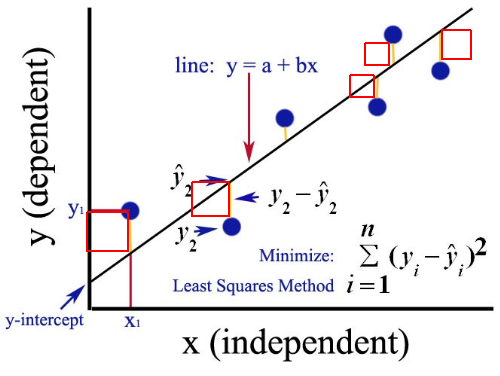

Feladat a négyzetek területének minimalizálása (MSE mint hibafüggvény)

#Polinomiális regresszió (egyváltozós eset)

A polinomiális regresszió egy regressziós algoritmus, amely n-edik fokú polinomként modellezi a függő(y) és független változó(x) közötti kapcsolatot. A polinomiális regressziós egyenlet az alábbiakban látható:
$$
y = b_0 + b_1 x + b_2 x^2 + b_3x^3 + \cdots
$$


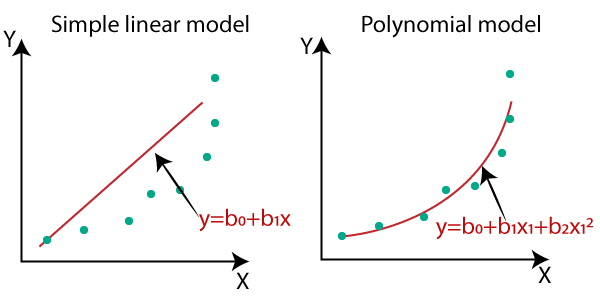

In [ ]:
import pandas as pd

# Load data using read_csv()
df_Salaries = pd.read_csv("https://raw.githubusercontent.com/karsarobert/Machine_Learning_2023/main/Position_Salaries.csv")
df_Salaries

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


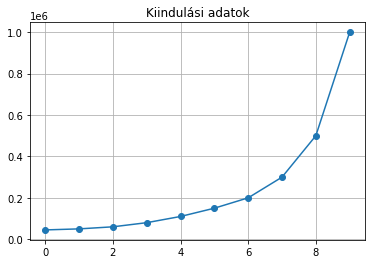

In [ ]:
df_Salaries['Salary'].plot(title='Kiindulási adatok', marker='o', grid=True);


In [ ]:
from sklearn.linear_model import LinearRegression

Salaries_reg = LinearRegression()
X1 = df_Salaries[['Level']] #független változók megadása
y1 = df_Salaries[['Salary']] # függő változók megadása
Salaries_reg.fit(X1, y1) # modell illesztése
df_Salaries['Salaries_pred'] = Salaries_reg.predict(df_Salaries[['Level']]) #predikció készítése

128454.54545454546

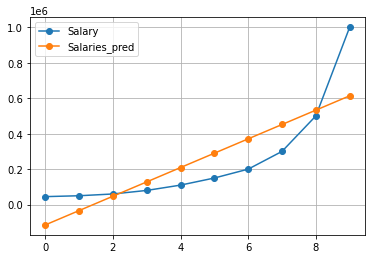

In [ ]:
from sklearn.metrics import mean_absolute_error

df_Salaries[['Salary','Salaries_pred']].plot(marker='o', grid=True)
mean_absolute_error(y1,df_Salaries['Salaries_pred']) #

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X1_poly = poly.fit_transform(X1) # átalakítjuk az X értékeket, új oszlopokkal bővytjük X^2,...


In [ ]:
X1_poly[:4] # vizsgáljuk meg hogyan alakította át a bemeneti X adatokat a PolynomialFeatures(degree=3)
# 0. hatvány, első, második, ...

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [ ]:
Salaries_reg.fit(X1_poly, y1)
df_Salaries['Salaries_pred_poly'] = Salaries_reg.predict(X1_poly)

34790.20979020849

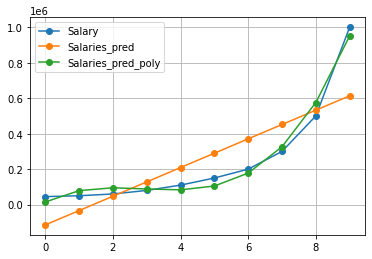

In [ ]:
df_Salaries[['Salary','Salaries_pred', 'Salaries_pred_poly' ]].plot(marker='o', grid=True)
mean_absolute_error(y1,df_Salaries['Salaries_pred_poly']) # abszolút hiba most jóval kisebb

In [ ]:
type(Salaries_reg.coef_[0,1])

Salaries_reg.intercept_

array([-121333.33333331])

In [ ]:
print(
    'Előre jelzett bér = {:.1f} + {:.1f} * évek száma + {:.1f} * évek számaa négyzeten + {:.1f} * évek száma a köbön'.format(
        Salaries_reg.intercept_[0], Salaries_reg.coef_[0,1], Salaries_reg.coef_[0,2], Salaries_reg.coef_[0,3]
    )
) 

Előre jelzett bér = -121333.3 + 180664.3 * évek száma + -48549.0 * évek számaa négyzeten + 4120.0 * évek száma a köbön


#Túlillesztés, alulillesztés
állítsuk a polinomfokot 1-re, 2, re 12-re
figyeljük meg hogyan változik X_poly mérete

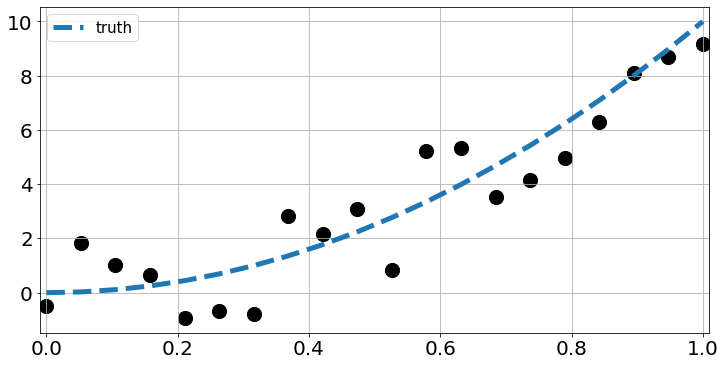

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
#X jelölje az időt, y pedig szabadesésben egy tárgy által megtett utat!

plt.figure(figsize=(12, 6))
np.random.seed(42)
X2 = np.linspace(0, 1, 20) # vegyünk fel 20 db X értékeket -1 és 1 között
y2= 10*X2**2 #számítsuk ki a négyzetét 
#y_measured =  y + np.random.random(20)*7
y_measured =  y2 + np.random.uniform(-1,1,20)*2 # Készítsünk szintetikus adatokat, amelyek az y-ból és némi zajból állnak fekete pontok
plt.plot(X2, y2, lw=5, label = 'truth', ls='--') # ábrázoljuk a kék szaggatott vonalat amely az adatok valódi értékeit jelentik, de ezeket az adtokat nem ismerjük
plt.scatter(X2, y_measured, s=200, c = 'k') # ábrázoljuk a szintetikus adatokat amit ismerünk pl. egy mérésből ezeket kaptuk!

# amikor regressziós modellt építünk csak az X és y_measured adatokat ismerjük!
#szeretnénk olyan modellt építeni amely egy adott X értékhez (korábban nem látott) olyan y értéket ad meg amely a lehető legközelebb van a kék szaggatott vonalhoz

plt.xlim(-.01, 1.01)
#plt.axis('off')
plt.legend(fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
#plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

reg = LinearRegression()
X2 = X2.reshape(-1, 1)
y_measured = y_measured.reshape(-1, 1)
poly = PolynomialFeatures(degree=16) #állítsuk a polinomfokot 1-re, 2, re 12-re figyeljük meg hogyan változik X_poly mérete
X_poly = poly.fit_transform(X2) # átalakítjuk az X értékeket, új oszlopokkal bővytjük X^2,x^3,...
reg.fit(X_poly,y_measured) # számítsuk ki az előrejelzett értékeket ezek a magas polinom szám esetén már nagyon pontosan illeszkednek

X_t = np.linspace(0,1,50).reshape(-1,1) # vegyünk fel most új X értékeket ezek nagyrészét a modell még nem látta hiszen finomabb beosztás 50 érték a korábbi 20 helyett
X_t_poly = poly.fit_transform(X_t) # az új értékekhez is végezzük el a polinomiális átalakítást, hiszen a modellnek több bemenet (oszlop) kell már!!!

y_pred = reg.predict(X_t_poly) # végezzük el az előrejelzést az új adatainkra is!!!


In [ ]:

X_poly_df = pd.DataFrame(X_poly) #alakítsuk át dataframe formába és vizsgáljuk meg!
X_poly_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.052632,0.002770,0.000146,0.000008,4.038611e-07,2.125585e-08,1.118729e-09,5.888046e-11,3.098972e-12,1.631038e-13,8.584409e-15,4.518110e-16,2.377953e-17,1.251554e-18,6.587126e-20,3.466909e-21
2,1.0,0.105263,0.011080,0.001166,0.000123,1.292355e-05,1.360374e-06,1.431973e-07,1.507340e-08,1.586673e-09,1.670183e-10,1.758087e-11,1.850618e-12,1.948019e-13,2.050546e-14,2.158470e-15,2.272073e-16
3,1.0,0.157895,0.024931,0.003936,0.000622,9.813824e-05,1.549551e-05,2.446660e-06,3.863147e-07,6.099706e-08,9.631114e-09,1.520702e-09,2.401109e-10,3.791224e-11,5.986144e-12,9.451806e-13,1.492390e-13
4,1.0,0.210526,0.044321,0.009331,0.001964,4.135537e-04,8.706395e-05,1.832925e-05,3.858790e-06,8.123768e-07,1.710267e-07,3.600562e-08,7.580131e-09,1.595817e-09,3.359615e-10,7.072873e-11,1.489026e-11
5,1.0,0.263158,0.069252,0.018224,0.004796,1.262066e-03,3.321226e-04,8.740068e-05,2.300018e-05,6.052679e-06,1.592810e-06,4.191606e-07,1.103054e-07,2.902774e-08,7.638879e-09,2.010231e-09,5.290083e-10
6,1.0,0.315789,0.099723,0.031491,0.009945,3.140424e-03,9.917127e-04,3.131724e-04,9.889656e-05,3.123049e-05,9.862261e-06,3.114398e-06,9.834942e-07,3.105771e-07,9.807698e-08,3.097168e-08,9.780530e-09
7,1.0,0.368421,0.135734,0.050007,0.018424,6.787693e-03,2.500729e-03,9.213212e-04,3.394341e-04,1.250547e-04,4.607278e-05,1.697418e-05,6.253646e-06,2.303975e-06,8.488328e-07,3.127279e-07,1.152155e-07
8,1.0,0.421053,0.177285,0.074646,0.031430,1.323372e-02,5.572092e-03,2.346144e-03,9.878502e-04,4.159369e-04,1.751313e-04,7.373951e-05,3.104821e-05,1.307293e-05,5.504393e-06,2.317639e-06,9.758480e-07
9,1.0,0.473684,0.224377,0.106284,0.050345,2.384759e-02,1.129623e-02,5.350845e-03,2.534611e-03,1.200605e-03,5.687077e-04,2.693878e-04,1.276048e-04,6.044436e-05,2.863154e-05,1.356231e-05,6.424252e-06


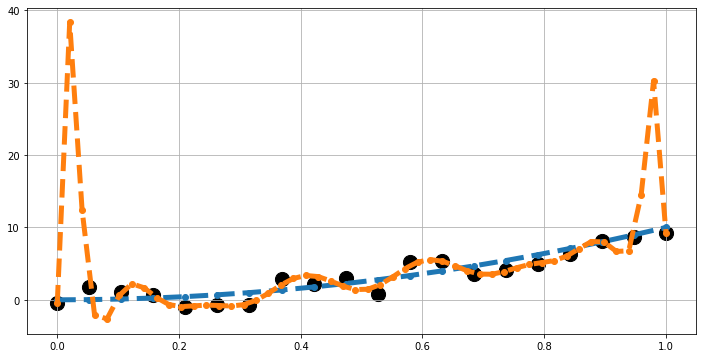

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(X2, y2, lw=5, label = 'truth', ls='--', marker='o')
plt.plot(X_t, y_pred, lw=5, label = 'truth', ls='--', marker='o')
plt.scatter(X2, y_measured, s=200, c = 'k')
plt.grid()
#plt.show()

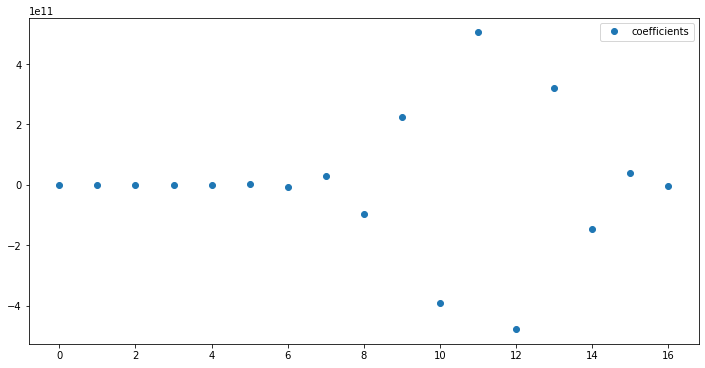

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(reg.coef_.reshape(-1,1), 'o', label='coefficients')
plt.legend()
# azt láthatjuk, hogy az együtthatók nagyon nagyok és váltakozó előjelűek ugrálnak!


In [ ]:
reg.coef_

array([[ 0.00000000e+00,  6.97852086e+03, -3.99208415e+05,
         9.63845405e+06, -1.32034067e+08,  1.16124129e+09,
        -7.01084890e+09,  3.02392119e+10, -9.54611819e+10,
         2.23528072e+11, -3.89962150e+11,  5.04707443e+11,
        -4.77550699e+11,  3.20754580e+11, -1.44771990e+11,
         3.93581948e+10, -4.86908578e+09]])

### Ridge regresszió ($L_2$ Regularizáció)

A regularizáció talán legelterjedtebb formája a *Ridge regresszió* vagy $L_2$ *regularizáció*, néha *Tihonov regularizáció* néven is ismert.
Ez a modellkoefficiensek négyzetösszegének (2-normáinak) büntetésével történik; ebben az esetben a modellillesztés büntetése a következő lenne 
$$
P = \alpha\sum_{n=1}^N \beta_n^2
$$
ahol $\alpha$ egy szabad paraméter, amely a büntetés erősségét szabályozza, $\beta_n$ pedig az együtthatókat jelöli


### Lasso regresszió ($L_1$ regularizáció)

A regularizáció egy másik, nagyon gyakori típusa a lasso, amely a regressziós együtthatók abszolút értékeinek (1-normák) összegének büntetését jelenti:
$$
P = \alpha\sum_{n=1}^N |\beta_n|
$$
Bár ez koncepcionálisan nagyon hasonló a ridge-regresszióhoz, az eredmények meglepően eltérőek lehetnek: például geometriai okokból a lasso regresszió hajlamos arra, hogy ahol lehetséges, a *ritkás modelleket* részesítse előnyben: azaz a modell együtthatóit lehetőleg pontosan nullára állítsa.



A költség függvény kiegészül egy új taggal: P
$$\sum_{i=1}^n(y_i-\hat{y}_i)^2 + P$$

$$\sum_{i=1}^n(y_i-\beta_0 x - b)^2 + P$$

In [ ]:
from sklearn.linear_model import Ridge, Lasso

reg_lasso = Lasso(alpha=0.001)
reg_ridge = Ridge(alpha=0.1)
reg_lasso.fit(X_poly,y_measured)
reg_ridge.fit(X_poly,y_measured)
y_test_pred = reg.predict(X_t_poly)
y_pred_lasso = reg_lasso.predict(X_t_poly)
y_pred_ridge = reg_ridge.predict(X_t_poly)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.467e-01, tolerance: 1.937e-02
  model = cd_fast.enet_coordinate_descent(


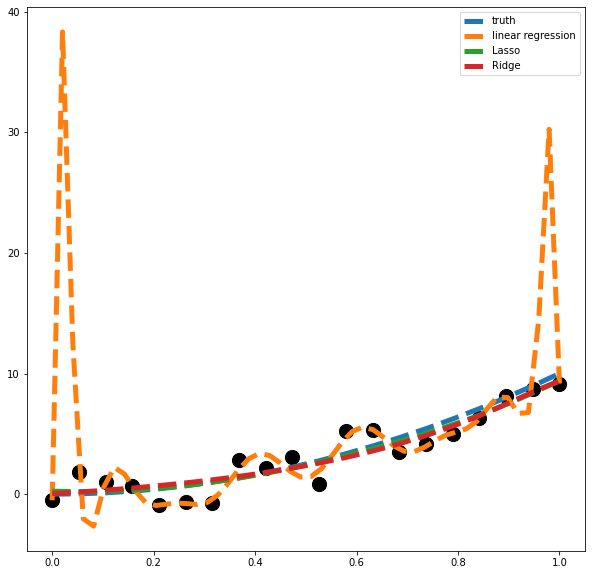

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X2, y_measured, s=200, c = 'k')
plt.plot(X2, y2, lw=5, label = 'truth', ls='--')
plt.plot(X_t, y_pred, lw=5, label = 'linear regression', ls='--')
plt.plot(X_t, y_pred_lasso, lw=5, label = 'Lasso', ls='--')
plt.plot(X_t, y_pred_ridge, lw=5, label = 'Ridge', ls='--')
plt.legend()
#plt.show()

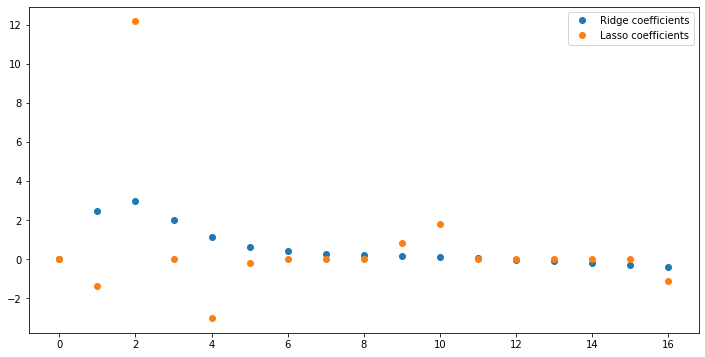

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(reg_ridge.coef_.reshape(-1,1), 'o', label='Ridge coefficients')
plt.plot(reg_lasso.coef_, 'o', label='Lasso coefficients')
plt.legend()
#plt.show()

#Vissza a Bostoni lakásárakhoz
figyeljük meg X_train_poly alakját!!!

In [ ]:
import pandas as pd

# Load data using read_csv()
Boston_dataset = pd.read_csv("https://raw.githubusercontent.com/karsarobert/Machine_Learning_2023/main/Boston.csv")



In [ ]:
X = Boston_dataset[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis','rad', 'tax', 'ptratio', 'black', 'lstat']]
y = Boston_dataset.medv



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

In [ ]:
from sklearn.linear_model import LinearRegression

Boston_regressor = LinearRegression()
Boston_regressor.fit(X_train, y_train)

y_prediction = Boston_regressor.predict(X_test)

In [ ]:
from sklearn.dummy import DummyRegressor

baselin = DummyRegressor(strategy='mean')
baselin.fit(X_train, y_train)

y_baselin = baselin.predict(X_test)
#y_baselin

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_prediction), 
        r2_score(y_test, y_baselin)
     )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_prediction), 
        mean_absolute_error(y_test, y_baselin)
    )
)
print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_prediction), 
        mean_squared_error(y_test, y_baselin)
    )
)

R2 Regressor = 0.54 vs Baseline = -0.00
MAE Regressor = 3.72 vs Baseline = 5.96
MSE Regressor = 30.11 vs Baseline = 66.28


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train) # átalakítjuk az X értékeket, új oszlopokkal bővytjük X^2,...
X_test_poly = poly.transform(X_test)



In [ ]:
print(X_train.shape)
print(X_train_poly.shape)


(303, 13)
(303, 105)


A másodfokú és a köbös jellemzőtranszformáció eléréséhez a degree paramétert 3-ra állítjuk.

Az egyik bosszantó dolog PolynomialFeatures, hogy nem követi nyomon a DataFrame oszlopneveit. A jellemzők neveit x0, x1, x2 és így tovább cseréli. Python-készségeink birtokában azonban visszaszerezhetjük oszlopneveinket. Tegyük pontosan ezt a következő kódblokk segítségével:

In [ ]:
feature_translator = [
    (f'x{i}', feature) for i, feature in enumerate(X_train.columns, 0)
]

def translate_feature_names(s):
    for key, val in feature_translator:
        s = s.replace(key, val)
    return s

poly_features = [
    translate_feature_names(f) for f in poly.get_feature_names()
]

X_train_poly = pd.DataFrame(X_train_poly, columns=poly_features)
X_test_poly = pd.DataFrame(X_test_poly, columns=poly_features)
X_train_poly.columns[:20]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Index(['1', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'zn0', 'zn1', 'zn2', 'crim^2', 'crim zn', 'crim indus',
       'crim chas', 'crim nox', 'crim rm'],
      dtype='object')

In [ ]:
X_train_poly[:5]

,1,crim,zn,indus,chas,nox,rm,age,dis,rad,...,tax^2,tax zn0,tax zn1,tax zn2,zn0^2,zn0 zn1,zn0 zn2,zn1^2,zn1 zn2,zn2^2
0,1.0,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,...,147456.0,8025.6,151772.16,4711.68,436.81,8260.516,256.443,156214.6576,4849.5948,150.5529
1,1.0,0.08014,0.0,5.96,0.0,0.499,5.850,41.5,3.9342,5.0,...,77841.0,5356.8,110735.10,2446.83,368.64,7620.480,168.384,157529.6100,3480.8130,76.9129
2,1.0,1.22358,0.0,19.58,0.0,0.605,6.943,97.4,1.8773,5.0,...,162409.0,5924.1,146462.29,1849.77,216.09,5342.421,67.473,132081.3649,1668.1437,21.0681
3,1.0,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4.0,...,94249.0,6447.0,120506.71,4245.81,441.00,8243.130,290.430,154079.8009,5428.6899,191.2689
4,1.0,0.13058,0.0,10.01,0.0,0.547,5.872,73.1,2.4775,6.0,...,186624.0,7689.6,146288.16,6639.84,316.84,6027.614,273.586,114670.2769,5204.7431,236.2369


In [ ]:
X_train_poly.drop('1',
  axis='columns', inplace=True)

X_test_poly.drop('1',
  axis='columns', inplace=True)



Boston_regressor.fit(X_train_poly, y_train)
y_test_pred = Boston_regressor.predict(X_test_poly)
y_train_pred = Boston_regressor.predict(X_train_poly) # kiszámoljuk a tréningadatokra is az előrejelzéseket!!!

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_test_pred), 
        r2_score(y_test, y_baselin)
     )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_test_pred), 
        mean_absolute_error(y_test, y_baselin)
    )
)
print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_test_pred), 
        mean_squared_error(y_test, y_baselin)
    )
)
print(
    'MSE Regressor on training data = {:.2f} !!!!!! túlillesztés'.format(
        r2_score(y_train, y_train_pred), 
        
    )
)

R2 Regressor = 0.61 vs Baseline = -0.00
MAE Regressor = 3.29 vs Baseline = 5.96
MSE Regressor = 25.72 vs Baseline = 66.28
MSE Regressor on training data = 0.95 !!!!!! túlillesztés


#OCCAM elv:
"It is vain to do with more what can be done with fewer."
"Hiábavaló többel megtenni azt, amit kevesebbel is meg lehet tenni."

In [ ]:
from sklearn.linear_model import Ridge, Lasso

reg = Lasso()
reg.fit(X_train_poly, y_train)

y_test_pred = reg.predict(X_test_poly)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.553e+03, tolerance: 2.928e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_test_pred), 
        r2_score(y_test, y_baselin)
     )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_test_pred), 
        mean_absolute_error(y_test, y_baselin)
    )
)
print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_test_pred), 
        mean_squared_error(y_test, y_baselin)
    )
)

R2 Regressor = 0.73 vs Baseline = -0.00
MAE Regressor = 2.95 vs Baseline = 5.96
MSE Regressor = 17.69 vs Baseline = 66.28


#Több funkció kombinálása statisztikai műveletekkel
Új funkciók hozhatók létre matematikai és statisztikai műveletek végrehajtásával a meglévő változókon. 
Például a teljes adósságot úgy tudjuk kiszámítani, hogy összegezzük az adósságot az egyes pénzügyi termékek között:

Összes adósság = autóhitel-tartozás + hitelkártya-tartozás + jelzálog-tartozás

Alternatív statisztikai műveletek segítségével más betekintést nyújtó funkciókat is levezethetünk. Például meghatározhatjuk egy ügyfél maximális adósságát a pénzügyi termékek között, azt a minimális időt, amelyet weboldalunk egy oldalán való böngészéssel töltött, vagy azt az átlagos időt, amelyet magazinunk cikkének olvasásával töltött:

maximális adósság = max(autóhitel egyenlege, hitelkártya egyenlege, jelzálog egyenlege)

Minimális idő az oldalon = min(idő a kezdőlapon, idő a körülbelül oldalon, idő a kapcsolatfelvételi oldalon)

Cikk olvasásának átlagos ideje = (az 1. cikkhez szükséges idő + a 2. cikkhez szükséges idő + a 3. cikk idője) / Darabszám (cikkek)

Elvileg bármilyen matematikai vagy statisztikai műveletet felhasználhatunk új funkciók létrehozására, mint például a szorzat, az átlag, a szórás, illetve a maximális vagy minimális értékek, hogy csak néhányat említsünk. Ebben a receptben ezeket a matematikai műveleteket pandák segítségével hajtjuk végre.

In [ ]:
import pandas as pd

# Load data using read_csv()
Boston_dataset = pd.read_csv("https://raw.githubusercontent.com/karsarobert/Machine_Learning_2023/main/Boston.csv")




In [ ]:
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis','rad', 'tax', 'ptratio', 'black', 'lstat']
X = Boston_dataset[features]
y = Boston_dataset.medv
X


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
X[features].prod(axis=1)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

In [ ]:
X['prod_features'] = X[features].prod(axis=1)

<ipython-input-37-888fffdad599>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['prod_features'] = X[features].prod(axis=1)


In [ ]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,prod_features
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,0.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,0.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,0.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,0.0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,0.0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,0.0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,0.0


In [ ]:
X['mean_features'] = X.mean(axis=1)

In [ ]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,prod_features,mean_features
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,0.0,57.921380
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0.0,54.692458
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,0.0,52.819885
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,0.0,50.200041
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,0.0,51.146161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,0.0,56.242659
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,0.0,57.045412
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,0.0,57.874804
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,0.0,57.573249


In [ ]:
X = Boston_dataset[features]

In [ ]:
X[['sum', 'prod','mean','std', 'max', 'min']] = X[features].agg(['sum', 'prod','mean','std', 'max', 'min'], axis='columns')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,sum,prod,mean,std,max,min
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,810.89932,0.0,62.376871,128.926582,396.90,0.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,765.69441,0.0,58.899570,121.703271,396.90,0.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,739.47839,0.0,56.882953,120.765781,392.83,0.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,702.80057,0.0,54.061582,118.875981,394.63,0.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,716.04625,0.0,55.080481,119.300382,396.90,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,787.39723,0.0,60.569018,124.497614,391.99,0.0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,798.63577,0.0,61.433521,125.694166,396.90,0.0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,810.24726,0.0,62.326712,125.999137,396.90,0.0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,806.02549,0.0,62.001961,125.169802,393.45,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

In [ ]:
from sklearn.linear_model import LinearRegression

Boston_regressor = LinearRegression()
Boston_regressor.fit(X_train, y_train)

y_prediction = Boston_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_prediction), 
        r2_score(y_test, y_baselin)
     )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_prediction), 
        mean_absolute_error(y_test, y_baselin)
    )
)
print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_prediction), 
        mean_squared_error(y_test, y_baselin)
    )
)

R2 Regressor = 0.75 vs Baseline = -0.01
MAE Regressor = 3.34 vs Baseline = 6.29
MSE Regressor = 17.98 vs Baseline = 72.75


#Regresszió 1 neuronnal

# A neuron #

Kezdjük tehát a neurális hálózat alapvető összetevőjével: az egyes neuronokkal. Egy **neuron** (vagy **egység**) egy bemenettel így néz ki:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/mfOlDR6.png" width="250" alt="Egy lineáris egység diagramja.">
<figcaption style="textalign: center; font-style: italic"><center>A lineáris egység: $y = w x + b$.
</center></figcaption>
</figura>

A bemenet az `x`. A neuronhoz való kapcsolódásának **súlya** van, ami `w`. Valahányszor egy érték átfolyik egy kapcsolaton, megszorozzuk az értéket a kapcsolat súlyával. Az `x` bemenet esetén, ami a neuronhoz eljut, az `w * x`. A neurális hálózat a súlyok módosításával "tanul".

A `b` a súly egy speciális fajtája, amelyet **biasnak** nevezünk. Az előfeszítéshez nem kapcsolódik semmilyen bemeneti adat; helyette egy `1`-et teszünk a diagramba, így a neuronhoz érkező érték csak `b` (mivel `1 * b = b`). Az előfeszítés lehetővé teszi a neuron számára, hogy a bemenetektől függetlenül módosítsa a kimenetet.

Az `y` az az érték, amelyet a neuron végül kiad. A kimenethez a neuron a kapcsolatain keresztül kapott értékeket összegzi. Ennek a neuronnak az aktivációja `y = w * x + b`, vagy a képletben $y = w x + b$.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margó:24px;">
    <strong>Az $y=w x + b$ képlet ismerős?</strong><br>
Ez egy egyenes egyenlete! Ez a meredekség-metszéspont egyenlet, ahol $w$ a meredekség és $b$ az y-metszés. 
</blockquote>

# Példa - A lineáris egység mint modell #

Bár az egyes neuronok általában csak egy nagyobb hálózat részeként működnek, gyakran hasznos, ha alapként egyetlen neuron modelljével kezdünk. Az egy neuronból álló modellek *lineáris* modellek. 

Gondoljuk végig, hogyan működhet ez egy olyan adathalmazon, mint a [80 Gabona](https://www.kaggle.com/crawford/80-cereals). Ha egy modellt képezünk ki a `'cukrok'-kal (gramm cukor adagonként) mint bemenet és a `'kalóriák'-kal (kalória adagonként) mint kimenet, akkor a torzítás `b=90`, a súly pedig `w=2.5`. Egy adagonként 5 gramm cukrot tartalmazó gabonapehely kalóriatartalmát így becsülhetjük meg:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/yjsfFvY.png" width="1000" alt="Számítás a lineáris egységgel.">
<figcaption style="textalign: center; font-style: italic"><center>Kiszámítás a lineáris egységgel.
</center></figcaption>
</figura>

És a képletünkkel összevetve azt kapjuk, hogy $kalória = 2,5 * 5 + 90 = 102,5$, ahogyan azt vártuk.

# Többszörös bemenet #

A *80 Cereals* adathalmaz sokkal több jellemzőt tartalmaz, mint csak a `'cukrok'`. Mi lenne, ha a modellünket ki akarnánk bővíteni olyan dolgokkal, mint a rost- vagy fehérjetartalom? Ez elég egyszerű. Csak több bemeneti kapcsolatot adunk a neuronhoz, egyet-egyet minden további jellemzőhöz. A kimenet megtalálásához minden bemenetet megszoroznánk a kapcsolati súlyával, majd összeadnánk őket.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/vyXSnlZ.png" width="300" alt="Három bemeneti kapcsolat: x0, x1 és x2, valamint az előfeszítés.">
<figcaption style="textalign: center; font-style: italic"><center>Egy lineáris egység három bemenettel.
</center></figcaption>
</figura>

Ennek a neuronnak a képlete a következő lenne: $y = w_0 x_0 + w_1 x_1 + w_2 x_2 + b$. Egy lineáris egység két bemenettel egy síkba illeszkedik, egy ennél több bemenettel rendelkező egység pedig egy hipersíkba.

# Lineáris egységek a Kerasban #

A Kerasban a legegyszerűbben a `keras.Sequential` segítségével hozhatunk létre egy modellt, amely egy neurális hálózatot *rétegek halmazaként* hoz létre. A fentihez hasonló modelleket egy *sűrű réteggel* hozhatunk létre (amiről a következőkben többet fogunk megtudni).

Definiálhatunk egy lineáris modellt, amely három bemeneti jellemzőt fogad el (`'cukor'`, `'rost'` és `'fehérje'`), és egyetlen kimenetet (`'kalória'`) állít elő a következőképpen:




In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

Az első argumentummal, az `units`, meghatározzuk, hogy hány kimenetet szeretnénk. Ebben az esetben mi csak a `'kalóriákat'` jelezzük előre, ezért az `units=1` értéket használjuk. 

A második argumentummal, az `input_shape`-vel megmondjuk a Kerasnak a bemenetek méreteit. Az `input_shape=[3]` beállítása biztosítja, hogy a modell három jellemzőt fogadjon el bemenetként (`'cukor'`, `'rost'` és `'fehérje'`).

Ez a modell most már készen áll a gyakorló adatokra való illesztésre!

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margó:24px;">
    <strong>Miért van a <code>input_shape</code> egy Python lista?</strong><br>
Az adatok, amelyeket ebben a kurzusban használni fogunk, általában táblázatos adatok lesznek, mint egy Pandas adatkeretben. Az adathalmaz minden egyes jellemzőjéhez lesz egy bemenetünk. A jellemzők oszlopok szerint vannak elrendezve, így mindig <code>input_shape=[num_columns]</code> lesz.

A Keras azért használ itt listát, hogy lehetővé tegye az összetettebb adathalmazok használatát. A képadatoknak például három dimenzióra lehet szükségük: <code>[magasság, szélesség, csatornák]</code>.
</blockquote>




# Rétegek #

A neurális hálózatok jellemzően **rétegekbe** szervezik neuronjaikat. Ha olyan lineáris egységeket gyűjtünk össze, amelyeknek közös bemenetük van, akkor egy **sűrű** réteget kapunk.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/2MA4iMV.png" width="300" alt="Három körből álló halom egy bemeneti rétegben, amely egy sűrű rétegben lévő két körhöz kapcsolódik.">
<figcaption style="textalign: center; font-style: italic"><center>Két lineáris egységből álló sűrű réteg, amely két bemenetet és egy torzítást kap.
</center></figcaption>
</figura>

Úgy is elképzelhetjük, hogy a neurális hálózat minden rétege valamilyen viszonylag egyszerű transzformációt hajt végre. A rétegek mély halmazán keresztül a neurális hálózat egyre összetettebb módon tudja átalakítani a bemeneteit. Egy jól képzett neurális hálózatban minden egyes réteg egy olyan átalakítás, amely egy kicsit közelebb visz minket a megoldáshoz.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margó:24px;">
    <strong>Sokféle réteg</strong><br>
A "réteg" a Kerasban egy nagyon általános jellegű dolog. Egy réteg lehet lényegében bármilyen <em>adattranszformáció</em>. Sok réteg, mint például a <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D">konvolúciós</a> és <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/RNN">recurrent</a> rétegek, neuronok felhasználásával alakítják át az adatokat, és elsősorban a kialakított kapcsolatok mintázatában különböznek. Másokat azonban <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding">új jellemzők kinyerésére</a> vagy csak <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Add">egyszerű számtani</a> feladatokra használnak. A rétegek egész világát fedezhetjük fel -- <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers">nézd meg őket</a>!
</blockquote>

# Az aktiválási függvény #

Kiderül azonban, hogy két sűrű réteg, amelyek között nincs semmi, semmivel sem jobb, mint egyetlen sűrű réteg önmagában. A sűrű rétegek önmagukban soha nem tudnak kimozdítani minket a vonalak és síkok világából. Amire szükségünk van, az valami *nemlineáris*. Aktiválási függvényekre van szükségünk.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/OLSUEYT.png" width="400" alt="">
<figcaption style="textalign: center; font-style: italic"><center>Az aktivációs függvények nélkül a neurális hálózatok csak lineáris összefüggéseket tudnak megtanulni. Ahhoz, hogy görbéket illesszünk, aktiválási függvényeket kell használnunk. 
</center></figcaption>
</figura>

Az **aktiválási függvény** egyszerűen valamilyen függvény, amelyet egy réteg minden egyes kimenetére (annak *aktivációira*) alkalmazunk. A legelterjedtebb az *egyenirányító* függvény $max(0, x)$.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/aeIyAlF.png" width="400" alt="Az egyenirányító függvény grafikonja. Az egyenes y=x, ha x>0, és y=0, ha x<0, ami egy "csuklós" alakot eredményez, mint a "_/"."> >.
<figcaption style="textalign: center; font-style: italic"><center>
</center></figcaption>
</figura>

Az egyenirányító függvény grafikonja egy egyenes, amelynek negatív része nullára "egyenirányított". A függvényt egy neuron kimeneteire alkalmazva egy *görbületet* tesz az adatokba, eltávolodva az egyszerű vonalaktól.

Ha az egyenirányítót egy lineáris egységhez kapcsoljuk, akkor egy **egyenirányított lineáris egységet** vagy **ReLU-t** kapunk. (Ezért szokás az egyenirányító függvényt "ReLU függvénynek" nevezni).  A ReLU-aktiválás lineáris egységre való alkalmazása azt jelenti, hogy a kimenet `max(0, w * x + b)` lesz, amit egy ilyen diagramon rajzolhatunk meg:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/eFry7Yu.png" width="250" alt="Egyetlen ReLU diagramja. Mint egy lineáris egység, de a '+' szimbólum helyett most egy csuklós '_/' van. ">
<figcaption style="textalign: center; font-style: italic"><center>Egy egyenirányított lineáris egység.
</center></figcaption>
</figura>

A kurzus késöbbi részében további aktivációs fügvényekkel is meg fogunk ismerkedni. (szigmoid, tanh, ...)



In [ ]:
import pandas as pd

df_sim = pd.DataFrame(
    {
        'X': np.arange(1,201),
        'y': np.arange(1,201)**2 + np.random.uniform(-1, 1, 200)*5, # uniform distribution egyenletes eloszlás
    }
)


In [ ]:
df_sim.set_index('X')[['y']]

,y
X,
1,4.507275
2,6.459745
3,8.085183
4,20.329381
5,29.909295
...,...
196,38411.342281
197,38812.306545
198,39202.451921


<Figure size 432x288 with 0 Axes>

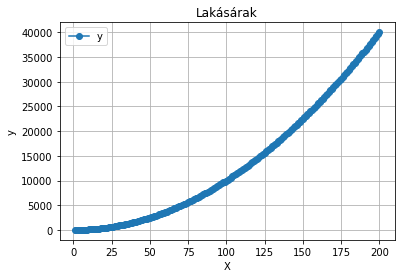

In [ ]:
import matplotlib.pyplot as plt 

plt.figure()
df_sim.set_index('X').plot(title='Lakásárak', kind='line', marker='o', grid=True, )
plt.ylabel('y')
plt.show()



In [ ]:
X = df_sim['X']
y = df_sim['y']

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=1, input_shape=[1])
])

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
history = model.fit(
    X, y,
    epochs=500,
    batch_size=32,
)

Epoch 1/500
7/7 [==============================] - 0s 2ms/step - loss: 13452.7227
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 13382.2500
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 13311.8887
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 13240.6377
Epoch 5/500
7/7 [==============================] - 0s 3ms/step - loss: 13170.9561
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 13101.0234
Epoch 7/500
7/7 [==============================] - 0s 3ms/step - loss: 13031.7959
Epoch 8/500
7/7 [==============================] - 0s 3ms/step - loss: 12962.2041
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 12890.7422
Epoch 10/500
7/7 [==============================] - 0s 3ms/step - loss: 12821.5059
Epoch 11/500
7/7 [==============================] - 0s 2ms/step - loss: 12751.4297
Epoch 12/500
7/7 [==============================] - 0s 3ms/step - loss: 12679.5898
Epoch 13/500


In [ ]:
df_sim['y_pred'] = model.predict(X)

7/7 [==============================] - 0s 2ms/step


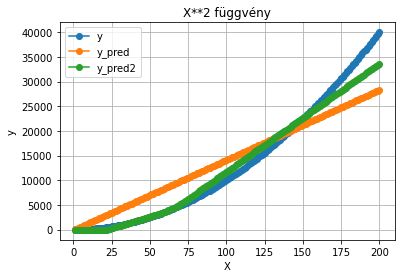

In [ ]:
df_sim.set_index('X').plot(title='X**2 függvény', kind='line', marker='o', grid=True, )
plt.ylabel('y')
plt.show()

In [ ]:
model2 = keras.Sequential([
    layers.Dense(units=16, activation='relu', input_shape=[1]), # próbáljuk ki 2 neuronnal 16-al, ...
    #layers.Dense(units=2, activation='relu'),
    layers.Dense(units=1)
])

In [ ]:
model2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
history = model2.fit(
    X, y,
    epochs=200,
    batch_size=32,
)

Epoch 1/200
7/7 [==============================] - 1s 4ms/step - loss: 13332.7627
Epoch 2/200
7/7 [==============================] - 0s 4ms/step - loss: 12793.4678
Epoch 3/200
7/7 [==============================] - 0s 4ms/step - loss: 11642.3672
Epoch 4/200
7/7 [==============================] - 0s 4ms/step - loss: 9755.3369
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 7127.0327
Epoch 6/200
7/7 [==============================] - 0s 4ms/step - loss: 4823.7578
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 4106.5146
Epoch 8/200
7/7 [==============================] - 0s 4ms/step - loss: 4604.4038
Epoch 9/200
7/7 [==============================] - 0s 4ms/step - loss: 4240.7349
Epoch 10/200
7/7 [==============================] - 0s 3ms/step - loss: 4052.5950
Epoch 11/200
7/7 [==============================] - 0s 3ms/step - loss: 4041.0603
Epoch 12/200
7/7 [==============================] - 0s 4ms/step - loss: 4002.0693
Epoch 13/200
7/7 [====

In [ ]:
df_sim['y_pred2'] = model2.predict(X)

7/7 [==============================] - 0s 2ms/step


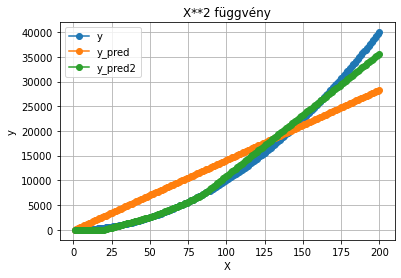

In [ ]:
df_sim.set_index('X').plot(title='X**2 függvény', kind='line', marker='o', grid=True, )
plt.ylabel('y')
plt.show()

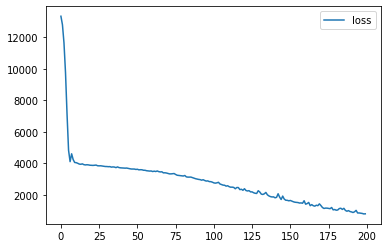

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot();